In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
abalone=pd.read_csv("/content/YAbalone.csv")

In [ ]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,O
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Y
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Y
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Y


In [ ]:
score=abalone.drop(columns=['Sex','Age'])

In [ ]:
score.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
import scipy.stats as stats

In [ ]:
stats.zscore(score)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [ ]:
x=score['Shell_weight']
y=score['Rings']

In [ ]:
def linear_regression(x,y):
  N=len(x)
  x_mean=x.mean()
  y_mean=y.mean()
  B1_num =((x-x_mean)*(y-y_mean)).sum()
  B1_den=((x-x_mean)**2).sum()
  B1=B1_num/B1_den
  B0=y_mean-(B1*x_mean)
  reg_line='y ={}+{}x'.format(B0,round(B1,3))
  return (B0,B1,reg_line)

In [ ]:
N= len(x)
x_mean = x.mean()
y_mean=y.mean()

In [ ]:

B1_num=((x-x_mean)*(y-y_mean)).sum()
B1_den=((x-x_mean)**2).sum()
B1=B1_num/B1_den

In [ ]:
B0=y_mean-(B1*x_mean)

In [ ]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [ ]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coefficient ', R)
print('R-Square: ', R**2)

Regression Line:  y =6.46211664699607+14.536x
Correlation Coefficient  0.6275740445103224
R-Square:  0.3938491813430441


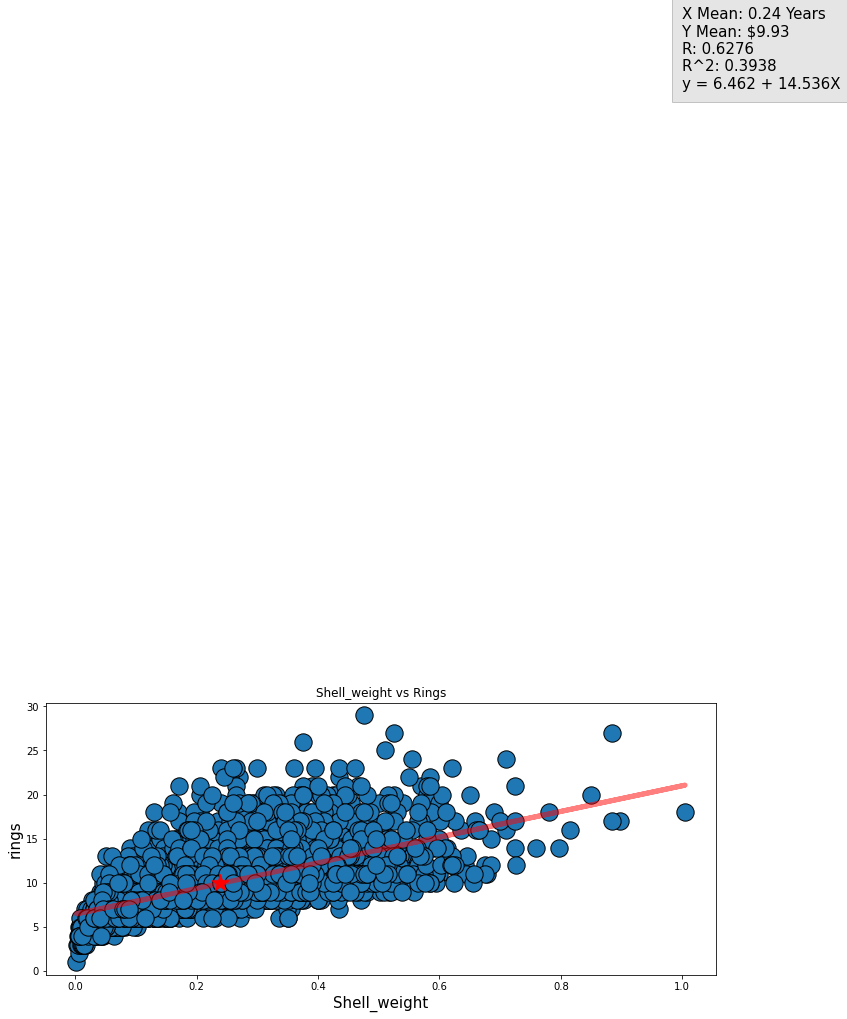

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=100, s=text, fontsize=15, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('Shell_weight vs Rings')
plt.xlabel('Shell_weight', fontsize=15)
plt.ylabel('rings', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

In [ ]:
+import numpy
actual = score['Height']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

SyntaxError: ignored

In [ ]:
import numpy
actual = score['Length']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

In [ ]:
import numpy
actual = score['Diameter']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

In [ ]:

import numpy
actual = score['Shucked_weight']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

In [ ]:
import numpy
actual = score['Viscera_weight']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

0.25383383542086035


In [ ]:
import numpy
actual = score['Whole_weight']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

0.29202100292591804


In [ ]:
import numpy
actual = score['Shell_weight']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

0.39384918134304325


In [ ]:
import numpy
actual = score['Height']
predict = score['Rings']
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)

0.31076981783840285
